**Libraries**

In [30]:
import sys
import re                                  # library for regular expression operations
import string                              # for string operations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

import nltk
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings


In [31]:
pd.set_option("display.max_colwidth",200)

**Reading Data**

In [32]:
df = pd.read_csv('train.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [34]:
df.shape

(31962, 3)

In [35]:
print("No. of non-racist tweets : {}".format(df[df['label']==0].shape[0]))
print("No. of racist tweets : {}".format(df[df['label']==1].shape[0]))

No. of non-racist tweets : 29720
No. of racist tweets : 2242


In [36]:
df[df['label']==0].head(7)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦


In [37]:
df[df['label']==1].head(7)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness


**Removing symbols , hashtags and shortwords**

In [38]:
df['tweet'] = df['tweet'].str.replace("[^a-zA-Z]"," ")   # remove hashtags , symbols
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 
#removing words whose length is less than 3
df['tweet']= df['tweet'].str.replace("user","")
df.head(7)

,id,label,tweet
0,1,0,when father dysfunctional selfish drags kids into dysfunction
1,2,0,thanks lyft credit cause they offer wheelchair vans disapointed getthanked
2,3,0,bihday your majesty
3,4,0,model love take with time
4,5,0,factsguide society motivation
5,6,0,huge fare talking before they leave chaos disputes when they there allshowandnogo
6,7,0,camping tomorrow danny


**Remove hyperlinks and retweets**

In [39]:

def remove_hyperlinks_marks_styles(tweet):
    
    # remove old style retweet text "RT"
    new_tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    new_tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', new_tweet)
    
    return new_tweet
    

**Tokenize the tweet**

In [40]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)

def tokenize_tweet(tweet):
    
    tweet_tokens = tokenizer.tokenize(tweet)
    
    return tweet_tokens
    

**Remove stopwords and punctuations**

In [41]:
nltk.download('stopwords')

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

punctuations = string.punctuation

def remove_stopwords_punctuations(tweet_tokens):
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in punctuations):
            tweets_clean.append(word)
            
    return tweets_clean
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Stemming**

In [42]:
stemmer = PorterStemmer()

def get_stem(tweets_clean):
    
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

**All preprocess techniques with example**

In [43]:
def process_tweet(tweet):
    
    processed_tweet = remove_hyperlinks_marks_styles(tweet)
    tweet_tokens = tokenize_tweet(processed_tweet)
    tweets_clean = remove_stopwords_punctuations(tweet_tokens)
    tweets_stem = get_stem(tweets_clean)
    
    return tweets_stem
    

In [44]:
tweet_example = df['tweet']
print(tweet_example[0])

processed_tweet = process_tweet(tweet_example[0])
print(processed_tweet)

 when father dysfunctional selfish drags kids into dysfunction
['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct']


**Plot of frequency of most occuring words**

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

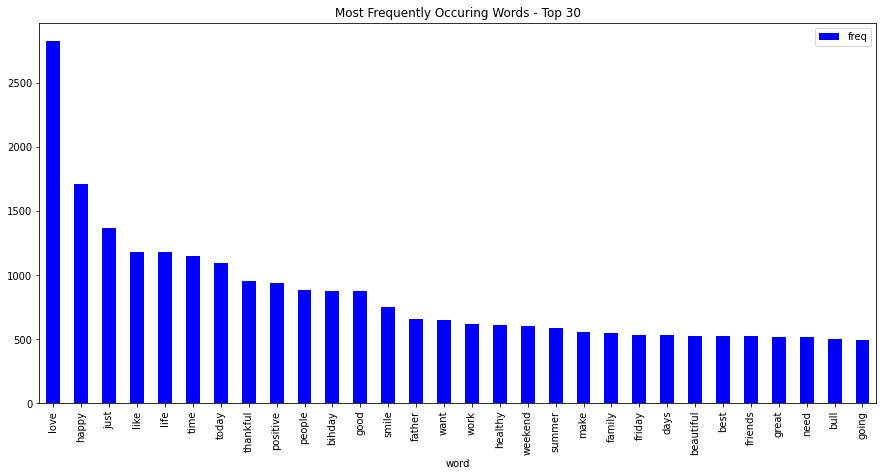

In [45]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

**Plot of freqency of most occuring words in racist tweets**

In [46]:
neg_df = pd.DataFrame()
neg=[]
for tweet,label in zip(df['tweet'],df['label']):
  if label==1 :
    neg.append(tweet)
neg_df['tweet']=neg

In [47]:
neg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2242 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


Text(0.5, 1.0, 'Most Frequently Occuring Racist Words - Top 30')

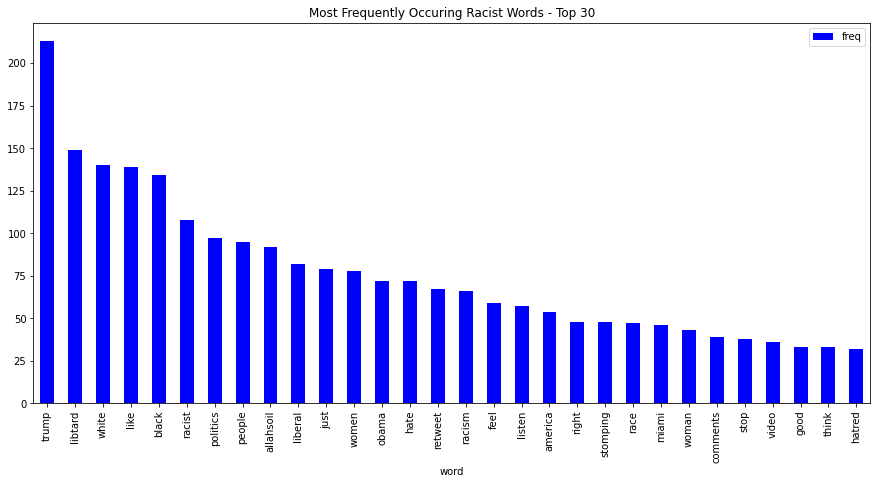

In [48]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(neg_df.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Racist Words - Top 30")

**Matrix Construction**

In [49]:
# function to get unique values
def unique_pro(list1):
     
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    
    return unique_list

In [50]:
# word : key -> dictionary

unique = {}
count=0;
for tweet,y in zip(df['tweet'],df['label']):
  li = process_tweet(tweet)
  for word in li:
    if word not in unique :
      unique[word]=count
      count+=1

# matrix -> cols - no. of unique words
neg = count

# matrix -> rows - no. of tweets => size of dataset
m = df['label'].shape[0]
ind =[]
val=[]
pointer =[]
pointer.append(0)
for tweet,y in zip(df['tweet'],df['label']):
  lis = process_tweet(tweet)
  li = unique_pro(lis)
  for word in li :
     ind.append(unique[word]) 
     val.append(lis.count(word))

  pointer.append(len(li))

print(len(ind))
print(len(val))
print(len(pointer))

200851
200851
31963


In [51]:
from scipy.sparse import *
from scipy import *
csr_matrix((val,ind,pointer))

<31962x29421 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

**Train Test Split - 70 : 30**

In [52]:
df_permutated = df.sample(frac=1)

train_size = 0.7
train_end = int(len(df_permutated)*train_size)

train = df_permutated[:train_end]
test = df_permutated[train_end:]
print("Train data size: {}\nTest data size: {}".format(len(train), len(test)))

Train data size: 22373
Test data size: 9589


In [53]:
# Changing Racist tweets to '0' and vice versa 
def reverse(label):
  if label==0:
    label= 1
  else:
    label= 0
  return label

In [54]:
df['label']=np.vectorize(reverse)(df['label'])

In [55]:
def create_frequency(tweets, label):
    
    freq_d = {}
    for tweet,y in zip(tweets,label):
      for word in process_tweet(tweet) :
        pair=(word,y)
        if pair in freq_d :
          freq_d[pair]+=1
        else:
          freq_d[pair]=freq_d.get(pair,1)

    
    return freq_d

In [56]:
# testing function

tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tire']
ys = [1, 0, 0, 0, 1]

freq_d = create_frequency(tweets, ys)
print(freq_d)

{('happi', 1): 1, ('trick', 0): 1, ('sad', 0): 1, ('tire', 0): 1, ('tire', 1): 1}


In [57]:
# build the freqs dictionary
freqs = create_frequency(df['tweet'],df['label'])

**Train Model Using Naive Bayes** 

In [99]:
def train_naive_bayes(freqs, train_x, label):
    '''
        logprior: the log prior.
        loglikelihood: the log likelihood of you Naive bayes equation.
    '''
    
    loglikelihood = {}
    logprior = 0
    
    # calculate the number of unique words in vocab
    unique_words = set([pair[0] for pair in freqs.keys()])
    
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
      if(pair[1]>0):
        N_pos+=freqs[(pair)]
      else:
        N_neg+=freqs[(pair)]

    # calculate the number of tweets
    D = label.shape[0]
    
    # the number of racist tweets
    D_pos = np.sum(label)
    
    # the number of non_rascist tweet
    D_neg = D-D_pos
    
    # calculate logprior
    logprior = np.log(D_pos)-np.log(D_neg)
    
    # for each unqiue word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1),0)
        freq_neg = freqs.get((word,0),0)
        
        # calculate the probability that word is positive, and negative
        if N_pos==0 : 
          p_w_pos = INT_MAX
        else :
          p_w_pos = (freq_pos)/(N_pos)
        if N_pos ==0 : 
          p_w_neg = INT_MAX
        else :
          p_w_neg = (freq_neg)/(N_neg)
        
        # calculate the log likelihood of the word
        if p_w_neg == 0 :
          p_w_neg=0.00001
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
    return logprior, loglikelihood

In [100]:
logprior, loglikelihood = train_naive_bayes(freqs,df['tweet'] , df['label'])
print(logprior)
print(len(loglikelihood))

2.5844518951995896
29421


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log


In [63]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    the sum of all the logliklihoods of each word in the tweet
    '''

    # process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # initialize probability to logprior
    p = logprior

    for word in word_l:
      if word in loglikelihood :
        p+=loglikelihood[word]

    return p

In [64]:

#  test function
for tweet in ['I am happy', 'I am racist', 'this movie should have been great.','trump is a racist', 'great great great',  'politics is a hatred race']:
   
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
    print(f'{tweet} -> {p:.2f}')

I am happy -> 5.22
I am racist -> -0.99
this movie should have been great. -> 3.87
trump is a racist -> -3.61
great great great -> 3.49
politics is a hatred race -> -4.20


**Testing Accuracy using Naive Bayes**

In [95]:
# test - 30

crct=wrng=0
tp=fp=tn=fn=0
for i,j in zip(test['label'],test['tweet']):
  s=""
  for word in process_tweet(j):
    s+=word
    s+=" "
  p = naive_bayes_predict(s, logprior, loglikelihood)
  if p>0 :
    if i==0 :
      crct+=1
      tp+=1
    else :
      wrng+=1
      fp+=1
  else :
    if i==1 :
      crct+=1
      tn+=1
    else :
      wrng+=1
      fn+=1

accuracy = crct /(crct+wrng)
interval = 1.96 * sqrt( (accuracy * (1 -accuracy)) /sample_len)
print("Accuracy using naive bayes: " ,'%.5f'% (accuracy*100)," +/- ",'%.3f\n' % interval)

precision = tp/(tp+fp)
interval = 1.96 * sqrt( (precision * (1 -precision)) /sample_len)
print("Precision using naive bayes: ", '%.5f'% (precision*100)," +/- ",'%.3f\n' % interval)

Recall = tp/(tp+fn)
interval = 1.96 * sqrt( (Recall * (1 -Recall)) /sample_len)
print("Sensitivity using naive bayes: " '%.5f'% (Recall*100)," +/- ",'%.3f\n' % interval)

f1_score = 2*Recall*precision/(Recall+precision)
interval = 1.96 * sqrt( (f1_score * (1 -f1_score)) /sample_len)
print("F1_score using naive bayes: " '%.5f'% (f1_score*100)," +/- ",'%.3f\n' % interval)

specificity = tn/(tn+fp)
interval = 1.96 * sqrt( (specificity * (1 -specificity)) /sample_len)
print("Specificity using naive bayes: " '%.5f'% (specificity*100)," +/- ",'%.3f\n' % interval)


Accuracy using naive bayes:  96.93399  +/-  0.003

Precision using naive bayes:  97.74030  +/-  0.003

Sensitivity using naive bayes: 99.00625  +/-  0.002

F1_score using naive bayes: 98.36920  +/-  0.003

Specificity using naive bayes: 67.61453  +/-  0.009



**Train model using Naive Bayes using laplace correction**

In [68]:
def train_naive_bayes_laplace(freqs, train_x, label):
    '''
        logprior: the log prior.
        loglikelihood: the log likelihood of you Naive bayes equation.
    '''
    
    loglikelihood = {}
    logprior = 0
    
    # calculate the number of unique words in vocab
    unique_words = set([pair[0] for pair in freqs.keys()])
    V = len(unique_words)
    
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
      if(pair[1]>0):
        N_pos+=freqs[(pair)]
      else:
        N_neg+=freqs[(pair)]

    # calculate the number of tweets
    D = label.shape[0]
    
    # the number of racist tweets
    D_pos = np.sum(label)
    
    # the number of non_rascist tweet
    D_neg = D-D_pos
    
    # calculate logprior
    logprior = np.log(D_pos)-np.log(D_neg)
    
    # for each unqiue word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1),0)
        freq_neg = freqs.get((word,0),0)
        
        # calculate the probability that word is positive, and negative
        p_w_pos = (freq_pos +1)/(N_pos+V)
        p_w_neg = (freq_neg +1)/(N_neg+V)
        
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
    return logprior, loglikelihood
        

In [69]:

logprior, loglikelihood = train_naive_bayes_laplace(freqs,df['tweet'] , df['label'])
print(logprior)
print(len(loglikelihood))

2.5844518951995896
29421


In [70]:
def naive_bayes_predict_laplace(tweet, logprior, loglikelihood):
    '''
    the sum of all the logliklihoods of each word in the tweet
    '''

    # process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # initialize probability to logprior
    p = logprior

    for word in word_l:
      if word in loglikelihood :
        p+=loglikelihood[word]

    return p

In [71]:

#  test function
for tweet in ['I am happy', 'I am racist', 'this movie should have been great.','trump is a racist', 'great great great',  'politics is a hatred race']:
   
    p = naive_bayes_predict_laplace(tweet, logprior, loglikelihood)
    print(f'{tweet} -> {p:.2f}')


I am happy -> 6.06
I am racist -> -0.05
this movie should have been great. -> 5.46
trump is a racist -> -1.75
great great great -> 6.16
politics is a hatred race -> -1.43


**Testing Accuracy using Laplace smoothing**

In [96]:
# test - 30

from math import sqrt

sample_len = test['label'].shape[0]
crct=wrng=0
tp=fp=tn=fn=0
for i,j in zip(test['label'],test['tweet']):
  s=""
  for word in process_tweet(j):
    s+=word
    s+=" "
  p = naive_bayes_predict_laplace(s, logprior, loglikelihood)
  if p>0 :
    if i==0 :
      crct+=1
      tp+=1
    else :
      wrng+=1
      fp+=1
  else :
    if i==1 :
      crct+=1
      tn+=1
    else :
      wrng+=1
      fn+=1

accuracy = crct /(crct+wrng)
interval = 1.96 * sqrt( (accuracy * (1 -accuracy)) /sample_len)
print("Accuracy using naive bayes with laplace smoothing: " '%.5f'% (accuracy*100)," +/- ",'%.3f\n' % interval)

precision = tp/(tp+fp)
interval = 1.96 * sqrt( (precision * (1 -precision)) /sample_len)
print("Precision using naive bayes with laplace smoothing: " '%.5f'% (precision*100)," +/- ",'%.3f\n' % interval)

Recall = tp/(tp+fn)
interval = 1.96 * sqrt( (Recall * (1 -Recall)) /sample_len)
print("Sensitivity using naive bayes with laplace smoothing: " '%.5f'% (Recall*100)," +/- ",'%.3f\n' % interval)

f1_score = 2*Recall*precision/(Recall+precision)
interval = 1.96 * sqrt( (f1_score * (1 -f1_score)) /sample_len)
print("F1_score using naive bayes with laplace smoothing: " '%.5f'% (f1_score*100)," +/- ",'%.3f\n' % interval)

specificity = tn/(tn+fp)
interval = 1.96 * sqrt( (specificity * (1 -specificity)) /sample_len)
print("Specificity using naive bayes with laplace smoothing: " '%.5f'% (specificity*100)," +/- ",'%.3f\n' % interval)

Accuracy using naive bayes with laplace smoothing: 96.93399  +/-  0.003

Precision using naive bayes with laplace smoothing: 97.74030  +/-  0.003

Sensitivity using naive bayes with laplace smoothing: 99.00625  +/-  0.002

F1_score using naive bayes with laplace smoothing: 98.36920  +/-  0.003

Specificity using naive bayes with laplace smoothing: 67.61453  +/-  0.009

